I am to predict the destiny of those how were on Titanic.

So to say Road map:

* To know what date I have
* Find correlated features, plot the dependences
* Build new features if necessary
* Apply logistic regression with polynom, find the best suited
* Apply SVM with polynom kernel
* Chose the best model, apply on test data and submit the result.

In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import fmin_tnc
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Part 1

In [529]:
df = pd.read_csv('/Users/apple/Documents/!data analysis/Kaggle/train.csv')
df_submit = pd.read_csv('/Users/apple/Documents/!data analysis/Kaggle/test.csv')

In [425]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [426]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In my opinion, to build the model I don't need Cabin number (here we see NaNs) and ticket number. (Embarkation influences badly on results)

In [427]:
df_new = df.iloc[:,[0,1,2,4,5,6,7,9,11]]

In [428]:
#What's more I'm going to make Sex numeric too.
#le = LabelEncoder()
#le.fit(df_new["Sex"])
#new_sex = le.transform(df_new["Sex"])
#df_new.insert(2,"Sex_",new_sex)
sex = df_new["Sex"].to_numpy()
sexlst = [1 if i=="male" else 2 for i in sex]

df_new.insert(3,"Sex_num",sexlst)
df_new = df_new.drop(["Sex"], axis=1)

In [429]:
df_new.head()

,PassengerId,Survived,Pclass,Sex_num,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,2,38.0,1,0,71.2833,C
2,3,1,3,2,26.0,0,0,7.9250,S
3,4,1,1,2,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [430]:
#from SibSp and Parch let's compute a total number of family members on board
#+1 = +the passenger his/her-self
sib_arr = df["SibSp"].to_numpy()
parch_arr = df["Parch"].to_numpy()
num = np.array([lambda x, y: x+y, sib_arr, parch_arr])

num = num[1]

df_new.insert(5,"FamMemb", num)

In [431]:
num

array([1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, 0, 0, 0,
       0, 0, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 2, 1, 4, 0, 1, 1, 0, 0, 0, 0, 1, 5, 0, 0, 1, 3, 0, 1,
       0, 0, 4, 2, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0,
       3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 4, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 4, 1, 0, 0, 1,
       3, 0, 0, 0, 8, 0, 4, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 8, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 4, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [432]:
df_new.head()

,PassengerId,Survived,Pclass,Sex_num,Age,FamMemb,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,1,0,7.2500,S
1,2,1,1,2,38.0,1,1,0,71.2833,C
2,3,1,3,2,26.0,0,0,0,7.9250,S
3,4,1,1,2,35.0,1,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,0,8.0500,S


In [433]:
#Embarked has Nones.
#freq_port = df_new.Embarked.dropna().mode()[0]
#df_new["Embarked"] = df_new["Embarked"].fillna(freq_port)
df_new["Age"] = df_new["Age"].fillna(np.mean(df_new["Age"]))
#df_new[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived')

In [434]:
#new_emb = []
#for i in df_new["Embarked"]:
#    if i == "C":
#       new_emb.append(0)
#    elif i == "Q":
#       new_emb.append(1)
#   elif i == "S":
#       new_emb.append(2)
#df_new.insert(4, "Port", new_emb)

In [435]:
df_new.head(1)

,PassengerId,Survived,Pclass,Sex_num,Age,FamMemb,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,1,0,7.25,S


In [436]:
df_new = df_new.drop(columns=["SibSp","Parch","PassengerId","Embarked"])

Let's look at correlation

In [437]:
df_new.corr(method="pearson")
# I see, that gender has the most influence on survival rate

,Survived,Pclass,Sex_num,Age,FamMemb,Fare
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,-0.549500
Sex_num,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.182333
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,0.091566
FamMemb,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.159651
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,1.000000


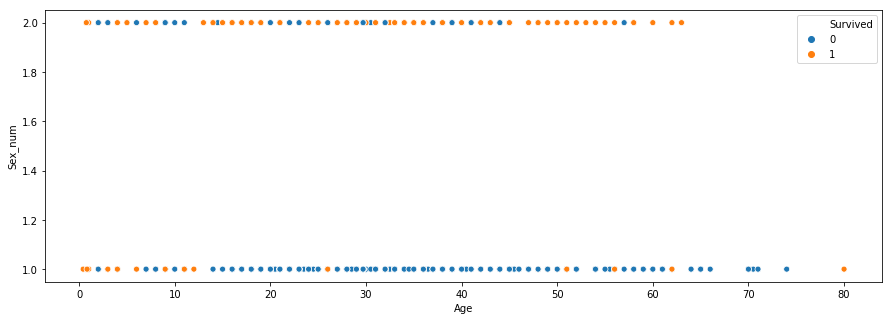

In [503]:
plt.rcParams["figure.figsize"] = (15,5)
data_plotting = df_new[["Survived","Age","Sex_num"]]
sns.scatterplot(data=data_plotting, x="Age", y="Sex_num", hue="Survived")

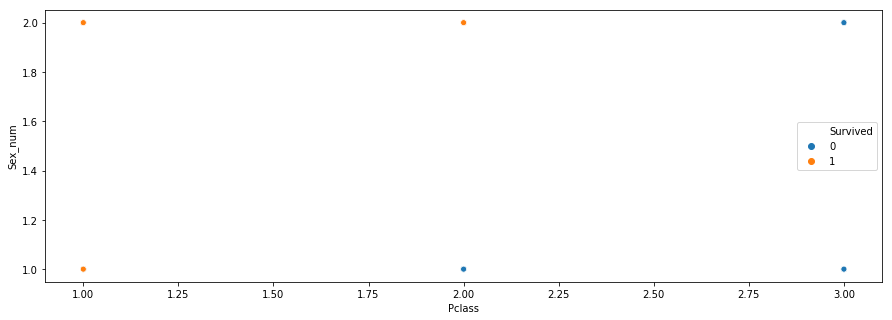

In [502]:
data_plotting = df_new[["Survived","Pclass","Sex_num"]]
sns.scatterplot(data=data_plotting, x="Pclass", y="Sex_num", hue="Survived")

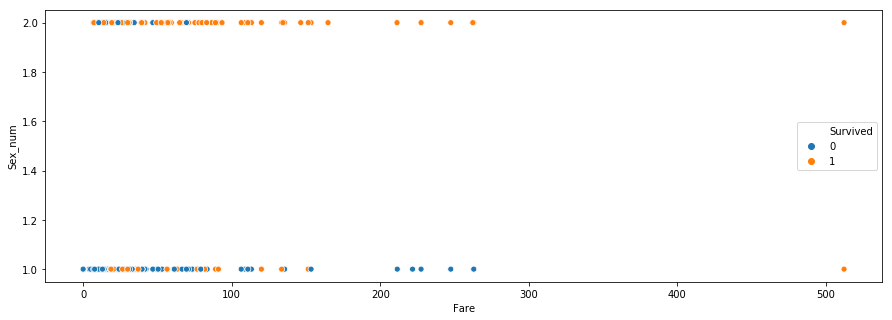

In [501]:
data_plotting = df_new[["Survived","Fare","Sex_num"]]
sns.scatterplot(data=data_plotting, x="Fare", y="Sex_num", hue="Survived")

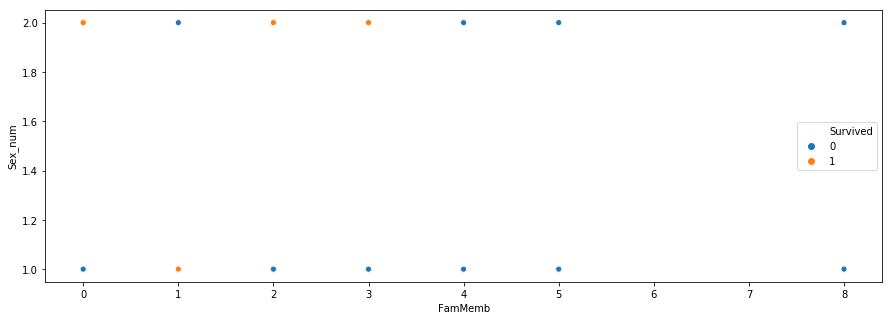

In [504]:
data_plotting = df_new[["Survived","FamMemb","Sex_num"]]
sns.scatterplot(data=data_plotting, x="FamMemb", y="Sex_num", hue="Survived")

Females are more likly to survive as well as kids (0-10) and old people (80).1st class passengers survived all, 2nd - only females, 3d class - none. Fare variable seems to carry the same information as the Pclass, perhaps, I won't use it. As for Family members, again survived frmales, when the number was not bigger, than 4. And males, when they were with someone.

In [438]:
df_new.head(1)

,Survived,Pclass,Sex_num,Age,FamMemb,Fare
0,0,3,1,22.0,1,7.25


Only sex has relativly high correlation with survived parameters, however for model let's try all

## Logistic Regression

In [506]:
dataX = df_new.iloc[:,[1,2,4]]
dataY = df_new.iloc[:,0]

In [507]:
dataX

,Pclass,Sex_num,FamMemb
0,3,1,1
1,1,2,1
2,3,2,0
3,1,2,1
4,3,1,0
...,...,...,...
886,2,1,0
887,1,2,0
888,3,2,1
889,1,1,0


In [508]:
sc = StandardScaler()
dataX = sc.fit_transform(dataX)

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [509]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size = 0.3, random_state = 42)

In [510]:
X_train = np.c_[np.ones(len(X_train)),X_train]
X_test = np.c_[np.ones(len(X_test)),X_test]
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [511]:
model1 = LogisticRegression(solver="lbfgs")
model1.fit(X_train, y_train)
predicted1 = model1.predict(X_train)
prediction_test1 = model1.predict(X_test)
parameters1 = model1.coef_

In [512]:
parameters1 = parameters1.reshape(-1,1)

In [513]:
#accuracy train and test
acc_train1 = metrics.accuracy_score(y_train, predicted1)
acc_test1 = metrics.accuracy_score(y_test, prediction_test1)
print(acc_train1, acc_test1)

0.7961476725521669 0.8097014925373134


In [514]:
#F1 score (precision and recall) for test and train
f1_train1 = metrics.f1_score(y_train, predicted1)
f1_test1 = metrics.f1_score(y_test, prediction_test1)
print(f1_train1, f1_test1)

0.7053364269141531 0.7536231884057971


In [515]:
#Let's make dict with our results
accuracy_dict = {"acc_train":[acc_train1],
                "acc_test":[acc_test1],
                "f1_train":[f1_train1],
                "f1_test":[f1_test1]}

In [516]:
#let's make function,that computes and adds accuracy to our dict
def add_accuracy(y_train, y_test, predict_train, predicted_test):
    acc_train = metrics.accuracy_score(y_train, predict_train)
    acc_test = metrics.accuracy_score(y_test, predicted_test)
    f1_train = metrics.f1_score(y_train, predict_train)
    f1_test = metrics.f1_score(y_test, predicted_test)
    accuracy_dict["acc_train"].append(acc_train)
    accuracy_dict["acc_test"].append(acc_test)
    accuracy_dict["f1_train"].append(f1_train)
    accuracy_dict["f1_test"].append(f1_test)
    return acc_train, acc_test, f1_train, f1_test

Logistic Regression with polynom features

In [517]:
#to find out the best polynom degree I'll try to apply it with different degrees(hope, 2,3,4 would be enough)
def poly_reg(degree, X_train, X_test, y_train, y_test, model):
    poly = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=True)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    model.fit(X_train_poly, y_train)
    predict_train = model.predict(X_train_poly)
    predicted_test = model.predict(X_test_poly)
    parameters = model.coef_
    iter_ = model.n_iter_
    
    return iter_, predict_train, predicted_test, parameters

In [518]:
model2 = LogisticRegression(solver="sag", penalty = "l2", max_iter=1500)
iter_, predict_train2, predicted_test2, parameters2= poly_reg(2, X_train, X_test, y_train, y_test, model2)

In [519]:
#the number of iterations required for converge
iter_

array([98], dtype=int32)

In [520]:
add_accuracy(y_train, y_test, predict_train2, predicted_test2)

(0.7961476725521669,
 0.8059701492537313,
 0.7011764705882353,
 0.7475728155339806)

## Logistic Regression with degree 3

In [521]:
model3 = LogisticRegression(solver="sag", penalty = "l2", max_iter=7000)
iter_, predict_train3, predicted_test3, parameters3= poly_reg(3, X_train, X_test, y_train, y_test, model3)

In [522]:
iter_

array([4268], dtype=int32)

In [523]:
add_accuracy(y_train, y_test, predict_train3, predicted_test3)

(0.8041733547351525, 0.8022388059701493, 0.693467336683417, 0.7282051282051283)

I think, this model is a bit overfitted

## SVM

In [524]:
model4 = svm.SVC(kernel = "poly", gamma="scale")
model4.fit(X_train, y_train)
prediction_train4 = model4.predict(X_train)
prediction_test4 = model4.predict(X_test)
parameters4 = model4.dual_coef_
add_accuracy(y_train, y_test, prediction_train4, prediction_test4)

(0.8041733547351525, 0.8022388059701493, 0.693467336683417, 0.7282051282051283)

In [525]:
accuracy_dict

{'acc_train': [0.7961476725521669,
  0.7961476725521669,
  0.8041733547351525,
  0.8041733547351525],
 'acc_test': [0.8097014925373134,
  0.8059701492537313,
  0.8022388059701493,
  0.8022388059701493],
 'f1_train': [0.7053364269141531,
  0.7011764705882353,
  0.693467336683417,
  0.693467336683417],
 'f1_test': [0.7536231884057971,
  0.7475728155339806,
  0.7282051282051283,
  0.7282051282051283]}

### Predictions for scoring Part1


In [530]:
df_submit.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [531]:
#le.fit(df_submit["Sex"])
#new_sex = le.transform(df_submit["Sex"])
#df_submit.insert(2,"Sex_",new_sex)
#df_submit = df_submit.drop(["Sex"], axis=1)
sex = df_submit["Sex"].to_numpy()
sexlst = [1 if i=="male" else 2 for i in sex]

df_submit.insert(3,"Sex_num",sexlst)

In [532]:
sib_arr = df_submit["SibSp"].to_numpy()
parch_arr = df_submit["Parch"].to_numpy()
num = np.array([lambda x, y: x+y, sib_arr, parch_arr])

num = num[1]

df_submit.insert(5,"FamMemb", num)

In [533]:
num

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 2, 3, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 5, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 8, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0,

In [534]:
#freq_port = df_submit.Embarked.dropna().mode()[0]
#df_submit["Embarked"] = df_submit["Embarked"].fillna(freq_port)
df_submit["Age"] = df_submit["Age"].fillna(np.mean(df_submit["Age"]))
df_submit["Fare"] = df_submit["Fare"].fillna(np.mean(df_submit["Fare"]))

In [535]:
#new_emb = []
#for i in df_submit["Embarked"]:
#   if i == "C":
#       new_emb.append(0)
#   elif i == "Q":
#       new_emb.append(1)
#   elif i == "S":
#       new_emb.append(2)
#df_submit.insert(4, "Port", new_emb)

In [536]:
df_submit.head(2)

,PassengerId,Pclass,Name,Sex_num,Sex,FamMemb,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,male,0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,female,1,47.0,1,0,363272,7.0000,NaN,S


In [537]:
dataX = df_submit.drop(columns=["SibSp","Parch","PassengerId","Embarked","Name","Ticket","Cabin","Sex","Age","Fare"])

In [538]:
dataX.head()

,Pclass,Sex_num,FamMemb
0,3,1,0
1,3,2,1
2,2,1,0
3,3,1,0
4,3,2,1


In [539]:
dataX.describe()

,Pclass,Sex_num,FamMemb
count,418.000000,418.000000,418.000000
mean,2.265550,1.363636,0.447368
std,0.841838,0.481622,0.896760
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,3.000000,1.000000,0.000000
75%,3.000000,2.000000,1.000000
max,3.000000,2.000000,8.000000


In [540]:
dataX = sc.fit_transform(dataX)

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [541]:
dataX = np.c_[np.ones(len(dataX)), dataX]

### Log Reg poly 2

In [542]:
poly = PolynomialFeatures(2, interaction_only=False, include_bias=True)
dataX_poly = poly.fit_transform(dataX)

In [543]:
result1 = model2.predict(dataX_poly)

In [544]:
result1

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [545]:
result1 = np.c_[df_submit.iloc[:,0],result1]

In [546]:
result_df1 = pd.DataFrame(data=result1, columns=["PassengerId", "Survived"])
print(result_df1)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [547]:
#np.savetxt("result.csv", result, delimiter=",")
result_df1.to_csv('result1.csv', index=False)

### Log Reg Poly3

In [548]:
poly = PolynomialFeatures(3, interaction_only=False, include_bias=True)
dataX_poly3 = poly.fit_transform(dataX)

In [549]:
result_poly3 = model3.predict(dataX_poly3)

In [550]:
result_poly3 = np.c_[df_submit.iloc[:,0],result_poly3]

In [551]:
result_df2 = pd.DataFrame(data=result_poly3, columns=["PassengerId", "Survived"])
print(result_df2)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [552]:
result_df2.to_csv('result_poly3.csv', index=False)

### SVM

In [553]:
result_svm = model4.predict(dataX)

In [554]:
result_svm = np.c_[df_submit.iloc[:,0],result_svm]

result_df_svm = pd.DataFrame(data=result_svm, columns=["PassengerId", "Survived"])
print(result_df_svm)

result_df_svm.to_csv('result_svm.csv', index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


## Results

**SVM model** gives higher score when submitting - **0.77511** against **Poly Log Reg** - **0.72248**

Transforming all variables to categoric didn't appear to get higher scores, I should remaster it.

**As I found out, Embarkation as a feature makes my prediction worse and the same with +1 to FamMemb.** 

**What's more, 0 and 1 for Sex is worse, than 1 and 2**

The reason maight be the following: when there are 0 and 1 - this variable turns to be nominal and has less weight, than when it is 1 and 2 - metrical variables. And the more range metrical variable has the more weight it has.

As following, when using Logistic Regression and SVM it's not necessary in my case add Age and Fare to features, since they have a wide range and little weight. As a result I've got the same score for SVM and **0.76** for Logistic Regression with both degrees.